In [ ]:
pip install backtrader

In [ ]:
pip install --force matplotlib==3.0.3

  Using cached https://files.pythonhosted.org/packages/e9/69/f5e05f578585ed9935247be3788b374f90701296a70c8871bcd6d21edb00/matplotlib-3.0.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b1/9a/7d474ba0860a41f771c9523d8c4ea56b084840b5ca4092d96bdee8a3b684/numpy-1.19.1-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ae/23/147de658aabbf968324551ea22c0c13a00284c4ef49a77002e91f79657b7/kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Us

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtrader as bt
import datetime

In [ ]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.title('dummy')
plt.plot([1,3,2,4])
plt.close()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('AAPL.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2015-08-10,2015-08-10,116.529999,119.989998,116.529999,119.720001,110.634941,54951600
2015-08-11,2015-08-11,117.809998,118.180000,113.330002,113.489998,104.877724,97082800
2015-08-12,2015-08-12,112.529999,115.419998,109.629997,115.239998,106.494896,101217500
2015-08-13,2015-08-13,116.040001,116.400002,114.540001,115.150002,106.411743,48535800
2015-08-14,2015-08-14,114.320000,116.309998,114.010002,115.959999,107.160263,42929500
...,...,...,...,...,...,...,...
2020-08-03,2020-08-03,432.799988,446.549988,431.570007,435.750000,434.965759,77037800
2020-08-04,2020-08-04,436.529999,443.160004,433.549988,438.660004,437.870514,43267900
2020-08-05,2020-08-05,437.510010,441.570007,435.589996,440.250000,439.457642,30498000
2020-08-06,2020-08-06,441.619995,457.649994,439.190002,455.609985,454.790009,50607200


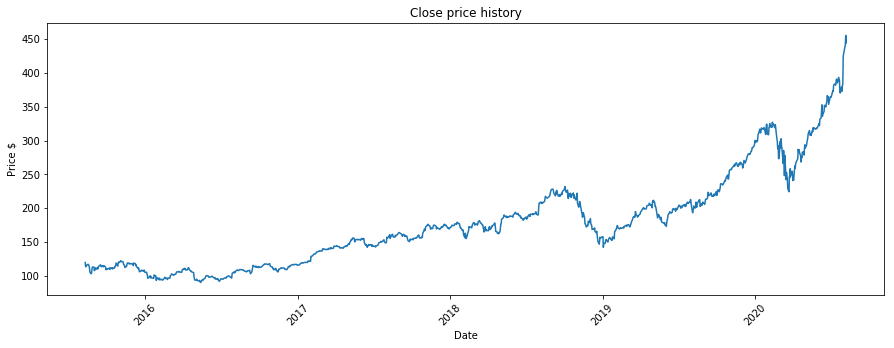

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.show()

In [ ]:
class MAcrossover(bt.Strategy): 
    #Moving average parameters
    params = (('pfast',20),('pslow',50))
    def log(self, txt, dt=None):     
        dt = dt or self.datas[0].datetime.date(0)     
        print('%s, %s' % (dt.isoformat(), txt)) 
    def __init__(self):     
        self.dataclose = self.datas[0].close     
        # Order variable will contain ongoing order details/status
        self.order = None     
        # Instantiate moving averages     
        self.slow_sma = bt.indicators.MovingAverageSimple(self.datas[0],                                       
                        period=self.params.pslow)     
        self.fast_sma = bt.indicators.MovingAverageSimple(self.datas[0], 
                        period=self.params.pfast)
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            #Active Buy/Sell order submitted/accepted - Nothing to do
            return
        #Check if an order has been completed
        #Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():             
                self.log('BUY EXECUTED, %.2f' % order.executed.price)         
            elif order.issell():             
                self.log('SELL EXECUTED, %.2f' % order.executed.price)
            self.bar_executed = len(self)
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')     
        #Reset orders  
        self.order = None

    def next(self):
        if self.order:
            return
        #Check if we are in the market
        if not self.position:
        #We are not in the market, look for a signal to OPEN trades
            #If the 20 SMA is above the 50 SMA
            if self.fast_sma[0] > self.slow_sma[0] and self.fast_sma[-1] < self.slow_sma[-1]:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                #Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
            #Otherwise if the 20 SMA is below the 50 SMA
            elif self.fast_sma[0] < self.slow_sma[0] and self.fast_sma[-1] > self.slow_sma[-1]:
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
            #Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
        else:
            # We are already in the market, look for a signal to CLOSE trades
            if len(self) >= (self.bar_executed + 5):
              self.log('CLOSE CREATE, %.2f' % self.dataclose[0])
              self.order = self.close()

Starting portfolio value: 10000.00
2018-10-29, SELL CREATE, 206.94
2018-10-30, SELL EXECUTED, 205.88
2018-11-06, CLOSE CREATE, 198.68
2018-11-07, BUY EXECUTED, 200.83
2019-02-12, BUY CREATE, 167.92
2019-02-13, BUY EXECUTED, 168.42
2019-02-21, CLOSE CREATE, 168.09
2019-02-22, SELL EXECUTED, 168.60
2019-05-24, SELL CREATE, 176.54
2019-05-28, SELL EXECUTED, 176.49
2019-06-04, CLOSE CREATE, 177.20
2019-06-05, BUY EXECUTED, 181.78
2019-07-01, BUY CREATE, 198.81
2019-07-02, BUY EXECUTED, 198.68
2019-07-10, CLOSE CREATE, 200.47
2019-07-11, SELL EXECUTED, 200.55
2020-03-06, SELL CREATE, 287.73
2020-03-09, SELL EXECUTED, 262.56
2020-03-16, CLOSE CREATE, 241.12
2020-03-17, BUY EXECUTED, 246.40
2020-04-30, BUY CREATE, 292.48
2020-05-01, BUY EXECUTED, 284.96
2020-05-08, CLOSE CREATE, 309.57
2020-05-11, SELL EXECUTED, 307.55
Final portfolio value: 10121.68
PnL: 121.68


<IPython.core.display.Javascript object>

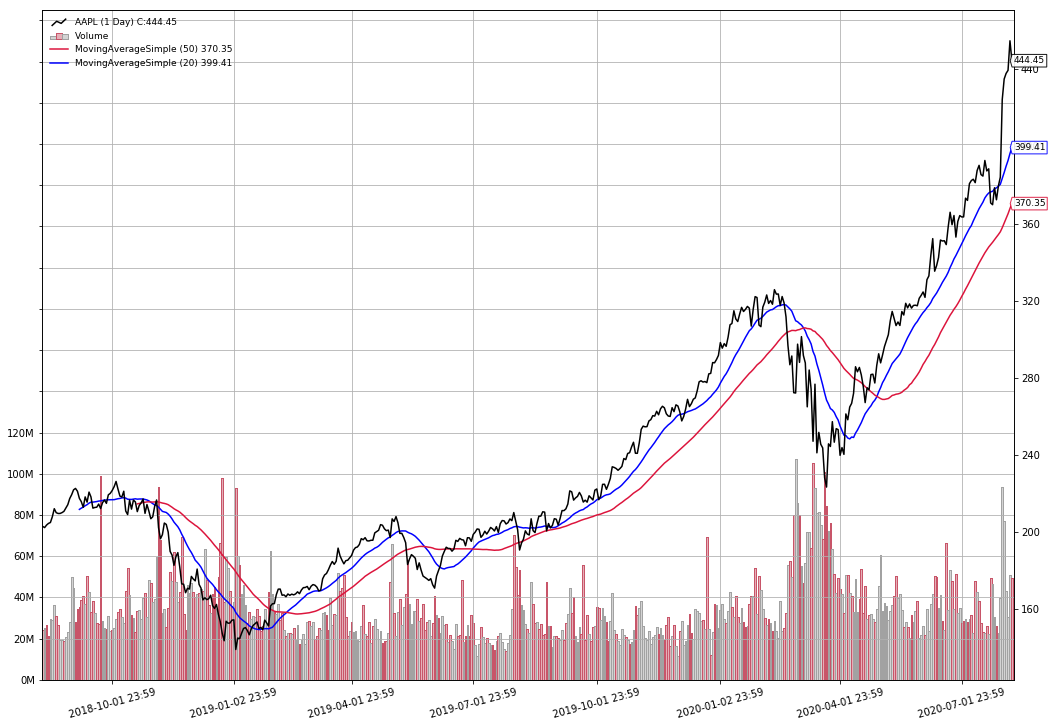

In [ ]:
if __name__ == '__main__':
  cerebro = bt.Cerebro();   #start cerebro engine
  cerebro.addstrategy(MAcrossover)  #add trading strategy to cerebro

  cerebro.addsizer(bt.sizers.FixedSize, stake=3) #default position size

#add data to cerebro
  data = bt.feeds.YahooFinanceCSVData(   
    dataname='AAPL.csv',
    fromdate = datetime.datetime(2018,8,9),
    todate = datetime.datetime(2020,8,9),
    reverse=False
  )
  cerebro.adddata(data)

  cerebro.broker.set_cash(10000) #set intial amount of cash
  start_portfolio_value = cerebro.broker.getvalue()
  print('Starting portfolio value: %.2f' % start_portfolio_value)
  cerebro.run(stdstats=False) #run the cerebro engine
  end_portfolio_value = cerebro.broker.getvalue()
  print('Final portfolio value: %.2f' % end_portfolio_value)
  pnl = end_portfolio_value - start_portfolio_value
  print('PnL: %.2f' % pnl)

  cerebro.plot()